# Credit Card Fraud

## The Dataset 

### Description

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- This dataset includes 7 features from an unamed institution, the target variable is a binary, whether a transaction is fradulent or not.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cc_df = pd.read_csv("/content/drive/MyDrive/fin-ml project/card_transdata.csv")

## Exploratory Data Analysis 

In [ ]:
#column names of the features we're working with 
for col in cc_df.columns:
    print(col)
    
print("Amount of data we're working with:", cc_df.shape[0])

distance_from_home
distance_from_last_transaction
ratio_to_median_purchase_price
repeat_retailer
used_chip
used_pin_number
online_order
fraud
Amount of data we're working with: 1000000


In [ ]:
#Checking for null values
print(cc_df.isnull().values.any())

False


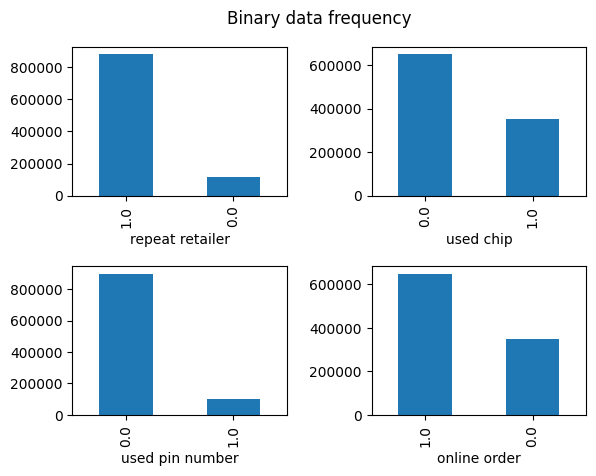

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3.0)
fig.suptitle("Binary data frequency")
cc_df["repeat_retailer"].value_counts().plot.bar(ax=axes[0,0]).set_xlabel('repeat retailer')
cc_df["used_chip"].value_counts().plot.bar(ax=axes[0,1]).set_xlabel('used chip')
cc_df["used_pin_number"].value_counts().plot.bar(ax=axes[1,0]).set_xlabel('used pin number')
cc_df["online_order"].value_counts().plot.bar(ax=axes[1,1]).set_xlabel('online order')
plt.show()

- The 'used pin number' and 'repeat retailer' features have different proportional frequencies, in order to account for this stratified sampling can be used.

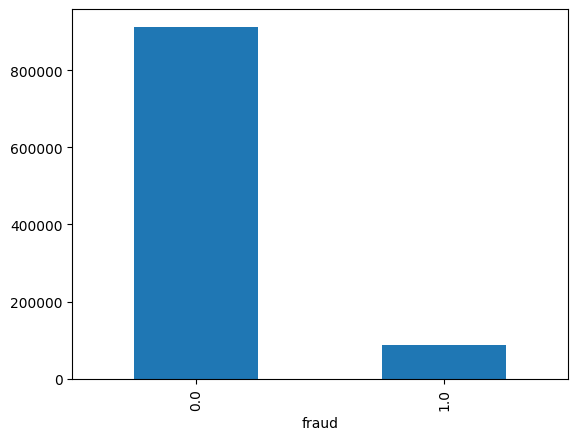

In [ ]:
cc_df["fraud"].value_counts().plot.bar().set_xlabel("fraud")
plt.show()

- The target variable also has a varying different proportion in terms of frequency, must be accounted for so the model does not only learn to detect for non-fradulent transactions.

In [ ]:
print(cc_df.distance_from_last_transaction.describe())

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64


In [ ]:
print(cc_df.ratio_to_median_purchase_price.describe())

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64


In [ ]:
print(cc_df.distance_from_home.describe())

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64


- Much of the continuous features have extreme outliers, to account for these extreme values and not just cut them out, the log of this data will be taken to have a more binomial distribution as to not affect the model.

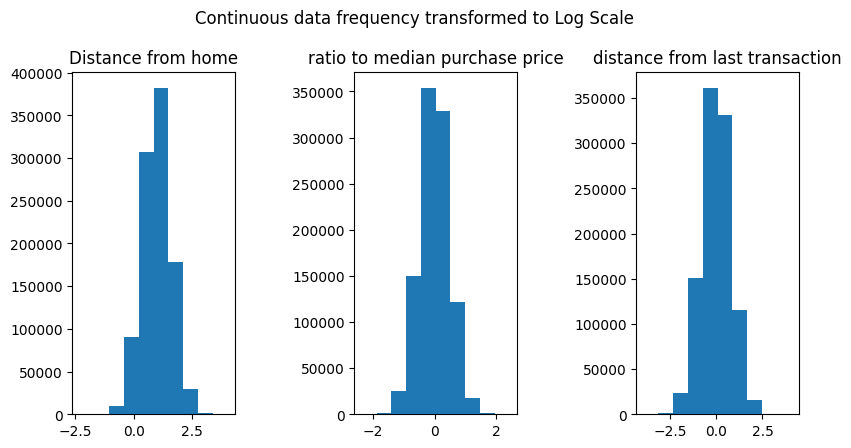

In [40]:
fig2, axes2 = plt.subplots(nrows=1, ncols=3)
fig2.tight_layout(pad=3.0)
fig2.suptitle("Continuous data frequency transformed to Log Scale", x = .65)
fig2.subplots_adjust(top=0.85, right = 1.25)
axes2[0].hist(np.log10(cc_df.distance_from_home))
axes2[0].set_title("Distance from home")
axes2[1].hist(np.log10(cc_df.ratio_to_median_purchase_price))
axes2[1].set_title("ratio to median purchase price")
axes2[2].hist(np.log10(cc_df.distance_from_last_transaction))
axes2[2].set_title("distance from last transaction")
plt.show()


### Transformation of continuous data to log

In [1]:
cc_df.distance_from_home

NameError: ignored